In [ ]:
import h5py
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

In [ ]:
from astroNN.datasets import galaxy10 
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

In [ ]:
images, labels = galaxy10.load_data() # 得，重新下载2.7G的数据集

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

x_train = x_train / 255.0
x_test = x_test / 255.0

# check dataset dimensions
x_train.shape, x_test.shape

C:\Users\yu.xi\.astroNN\datasets\Galaxy10_DECals.h5 was found!


((14188, 256, 256, 3), (3548, 256, 256, 3))

0
0    1081
1    1853
2    2645
3    2027
4     334
5    2043
6    1829
7    2628
8    1423
9    1873
Name: count, dtype: int64


<ipython-input-4-8b666b84ceb1>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


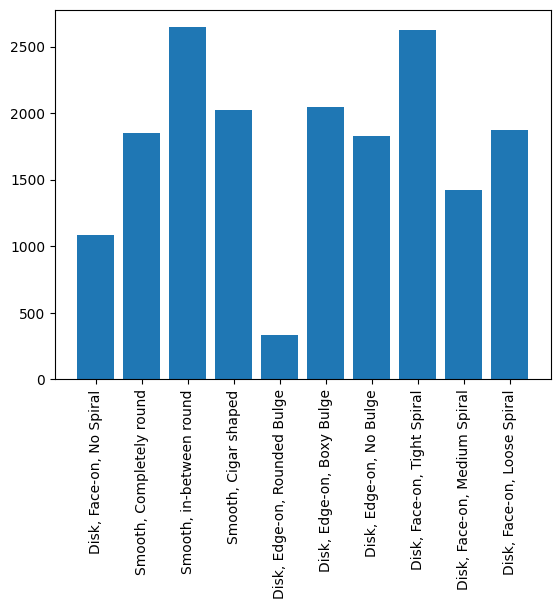

In [ ]:
df = pd.DataFrame(data=labels)

counts = df.value_counts().sort_index()
print(counts)

def class_distribution(x, y, labels):
    fig, ax = plt.subplots() # 建立画布窗口，等效于 fig, ax = plt.subplots(11)
    ax.bar(x, y) # 定义一个bar图
    ax.set_xticklabels(labels, rotation=90)
    plt.show()
    
class_distribution(features, counts, features)

In [ ]:
model2 = Sequential()

In [ ]:
model2.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(69,69,3)))

d:\py\venv_galaxyclas\'venv_galaxyclas'\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [ ]:
model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh'))
model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

model2.add(Flatten())
model2.add(Dense(units=120, activation='tanh'))
model2.add(Dense(units=84, activation='tanh'))
model2.add(Dense(units=10, activation='softmax'))

model_optimizer = Adam(learning_rate=0.001)

reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model2.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model2.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

Epoch 1/10


ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 3136, but received input with shape (None, 59536)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 256, 256, 3), dtype=float32)
  • training=True
  • mask=None

In [ ]:
model3=Sequential()
model3.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(256,256,3)))
model3.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh'))
model3.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model3.add(Flatten())
model3.add(Dense(units=120, activation='tanh'))
model3.add(Dense(units=84, activation='tanh'))
model3.add(Dense(units=10, activation='softmax'))


d:\py\venv_galaxyclas\'venv_galaxyclas'\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [ ]:
model_optimizer = Adam(learning_rate=0.001)

In [ ]:
reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

In [ ]:
model3.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [ ]:
model3.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

Epoch 1/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 90s 186ms/step - accuracy: 0.1341 - loss: 2.3357 - learning_rate: 0.0010
Epoch 2/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 84s 189ms/step - accuracy: 0.1361 - loss: 2.2382 - learning_rate: 0.0010
Epoch 3/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 77s 173ms/step - accuracy: 0.1448 - loss: 2.2475 - learning_rate: 1.0000e-06
Epoch 4/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 89s 200ms/step - accuracy: 0.1481 - loss: 2.2476 - learning_rate: 1.0000e-09
Epoch 5/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 88s 198ms/step - accuracy: 0.1468 - loss: 2.2438 - learning_rate: 1.0000e-12
Epoch 6/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 88s 199ms/step - accuracy: 0.1491 - loss: 2.2451 - learning_rate: 1.0000e-15
Epoch 7/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 95s 213ms/step - accuracy: 0.1505 - loss: 2.2388 - learning_rate: 1.0000e-18
Epoch 8/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 119s 161ms/step - accuracy: 0.1462 - loss: 2.2452 - learning_rate: 1.0000e-21
Epoch 9/10
444/444 ━━━━━━━━━━━━━━━━━━━━ 71s 160ms/step - accuracy: 0.14

In [ ]:
model4=Sequential()
model4.add(Conv2D(filters=6, kernel_size=(20,20), strides=(4,4), activation='tanh', input_shape=(256,256,3)))
model4.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model4.add(Conv2D(filters=16, kernel_size=(20,20), strides=(4,4), activation='tanh'))
model4.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model4.add(Flatten())
model4.add(Dense(units=120, activation='tanh'))
model4.add(Dense(units=84, activation='tanh'))
model4.add(Dense(units=10, activation='softmax'))
model_optimizer = Adam(learning_rate=0.001)

reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model4.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

In [ ]:
model4.fit(x_train, y_train, epochs=5, callbacks=[reduceLR])

Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 83s 170ms/step - accuracy: 0.1724 - loss: 2.1842 - learning_rate: 0.0010
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 72s 162ms/step - accuracy: 0.2214 - loss: 2.0056 - learning_rate: 0.0010
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 73s 164ms/step - accuracy: 0.2373 - loss: 1.9500 - learning_rate: 0.0010
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 78s 175ms/step - accuracy: 0.2136 - loss: 1.9271 - learning_rate: 1.0000e-06
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 77s 174ms/step - accuracy: 0.2179 - loss: 1.9182 - learning_rate: 1.0000e-09


In [ ]:
model5=Sequential()
model5.add(Conv2D(filters=6, kernel_size=(9,9), strides=(4,4), activation='tanh', input_shape=(256,256,3)))
model5.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model5.add(Conv2D(filters=16, kernel_size=(9,9), strides=(4,4), activation='tanh'))
model5.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model5.add(Flatten())
model5.add(Dense(units=120, activation='tanh'))
model5.add(Dense(units=84, activation='tanh'))
model5.add(Dense(units=10, activation='softmax'))
model_optimizer = Adam(learning_rate=0.001)

reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model5.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model5.fit(x_train, y_train, epochs=5, callbacks=[reduceLR])

Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 16s 15ms/step - accuracy: 0.2140 - loss: 2.0645 - learning_rate: 0.0010
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.3488 - loss: 1.7615 - learning_rate: 0.0010
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.4395 - loss: 1.5114 - learning_rate: 0.0010
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.5202 - loss: 1.3255 - learning_rate: 0.0010
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5643 - loss: 1.2221 - learning_rate: 0.0010


In [ ]:
model5.fit(x_train, y_train, epochs=5, callbacks=[reduceLR])

Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5987 - loss: 1.1331 - learning_rate: 0.0010
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6154 - loss: 1.0674 - learning_rate: 0.0010
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6392 - loss: 1.0152 - learning_rate: 0.0010
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6571 - loss: 0.9729 - learning_rate: 0.0010
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.6649 - loss: 0.9317 - learning_rate: 0.0010


In [ ]:
predict = model5.predict(x_test).argmax(axis=1)

111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step


In [ ]:
classification_report(y_test, predict)

'              precision    recall  f1-score   support\n\n           0       0.47      0.12      0.19       220\n           1       0.61      0.46      0.53       369\n           2       0.79      0.87      0.83       555\n           3       0.69      0.84      0.76       380\n           4       0.41      0.46      0.43        65\n           5       0.46      0.56      0.50       405\n           6       0.50      0.54      0.52       341\n           7       0.48      0.44      0.46       542\n           8       0.77      0.77      0.77       265\n           9       0.72      0.78      0.75       406\n\n    accuracy                           0.62      3548\n   macro avg       0.59      0.58      0.57      3548\nweighted avg       0.61      0.62      0.61      3548\n'

Text(50.722222222222214, 0.5, 'True class')

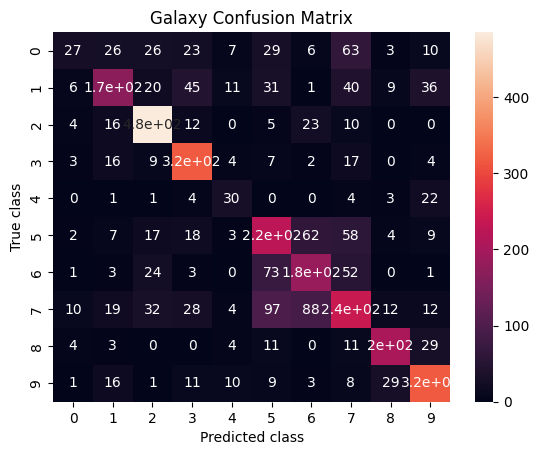

In [ ]:
matrix = confusion_matrix(y_test, predict)
sns.heatmap(matrix, annot=True)
plt.title('Galaxy Confusion Matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')

In [ ]:
model5.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 62, 62, 6)      │         1,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_10            │ (None, 31, 31, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 6, 6, 16)       │         7,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_11            │ (None, 3, 3, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 144)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 120)            │        17,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,012 (441.46 KB)

 Trainable params: 37,670 (147.15 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 75,342 (294.31 KB)

In [ ]:
model6=Sequential()
model6.add(Conv2D(filters=16, kernel_size=(9,9), strides=(4,4), activation='tanh', input_shape=(256,256,3)))
model6.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model6.add(Conv2D(filters=32, kernel_size=(9,9), strides=(4,4), activation='tanh'))
model6.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model6.add(Flatten())
model6.add(Dense(units=120, activation='tanh'))
model6.add(Dense(units=84, activation='tanh'))
model6.add(Dense(units=10, activation='softmax'))
model_optimizer = Adam(learning_rate=0.001)

reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

model6.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])

d:\py\venv_galaxyclas\'venv_galaxyclas'\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


In [ ]:
model6.fit(x_train, y_train, epochs=5, callbacks=[reduceLR])

Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.2248 - loss: 2.0356 - learning_rate: 0.0010
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.3815 - loss: 1.6649 - learning_rate: 0.0010
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.5098 - loss: 1.3405 - learning_rate: 0.0010
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.5875 - loss: 1.1568 - learning_rate: 0.0010
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.6233 - loss: 1.0458 - learning_rate: 0.0010


In [ ]:
model6.fit(x_train, y_train, epochs=5, callbacks=[reduceLR])

Epoch 1/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.6445 - loss: 0.9939 - learning_rate: 0.0010
Epoch 2/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.6764 - loss: 0.9279 - learning_rate: 0.0010
Epoch 3/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.7111 - loss: 0.8307 - learning_rate: 0.0010
Epoch 4/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.7185 - loss: 0.7961 - learning_rate: 0.0010
Epoch 5/5
444/444 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.7454 - loss: 0.7341 - learning_rate: 0.0010
